In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import imageio
import matplotlib.ticker as ticker
import pickle


import random
import scipy.special as sp
from matplotlib import cm
import seaborn as sns
import pandas as pd



Bad key "text.kerning_factor" on line 4 in
C:\Users\ek672\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:

def quiver_geopot_plot(U,V,Phi,lambdas,mus,sparseness):
    
    X = lambdas*180/np.pi
    Y = np.arcsin(mus)*180/np.pi

    plt.contourf(X, Y, (Phi))
    
    bounds=[-100000,1.2*10**4,4.4*10**5,8.6*10**5,1.3*10**6,1.7*10**6,2.1*10**6,2.6*10**6,3.0*10**6,3.4*10**6,3.8*10**6]
    bounds=np.array(bounds)+4*10**6
    bounds2=np.interp(np.linspace(4*10**6-100000,4*10**6+3.8*10**6,len(bounds)*20),bounds,bounds)

    CS = plt.contourf(X, Y, (Phi), levels=bounds2, cmap=cm.nipy_spectral, extend='both')  
    colorbar = plt.colorbar(CS)
    
    Xsparse=X[0::sparseness]
    Ysparse=Y[0::sparseness]
  
    Usparse=U[0::sparseness,0::sparseness]
    Vsparse=V[0::sparseness,0::sparseness]


    plt.quiver(Xsparse,Ysparse,Usparse,Vsparse)

    plt.show()
    

In [3]:
def read_pickle(filename):
    infile = open(filename,'rb')
    var = pickle.load(infile)
    infile.close()
    return var

In [4]:
PhiA3Taurad0p1=read_pickle('Phi-a3-taurad0p1')
PhiA3Taurad1=read_pickle('Phi-a3-taurad1')
PhiA3Taurad10=read_pickle('Phi-a3-taurad10')

PhiPBSTaurad0p1=read_pickle('Phi-PBS-taurad0p1')
PhiPBSTaurad1=read_pickle('Phi-PBS-taurad1')
PhiPBSTaurad10=read_pickle('Phi-PBS-taurad10')

UA3Taurad0p1=read_pickle('U-a3-taurad0p1')
UA3Taurad1=read_pickle('U-a3-taurad1')
UA3Taurad10=read_pickle('U-a3-taurad10')

UPBSTaurad0p1=read_pickle('U-PBS-taurad0p1')
UPBSTaurad1=read_pickle('U-PBS-taurad1')
UPBSTaurad10=read_pickle('U-PBS-taurad10')

VA3Taurad0p1=read_pickle('V-a3-taurad0p1')
VA3Taurad1=read_pickle('V-a3-taurad1')
VA3Taurad10=read_pickle('V-a3-taurad10')

VPBSTaurad0p1=read_pickle('V-PBS-taurad0p1')
VPBSTaurad1=read_pickle('V-PBS-taurad1')
VPBSTaurad10=read_pickle('V-PBS-taurad10')

mus=read_pickle('mus')
lambdas=read_pickle('lambdas')

sparseness=4

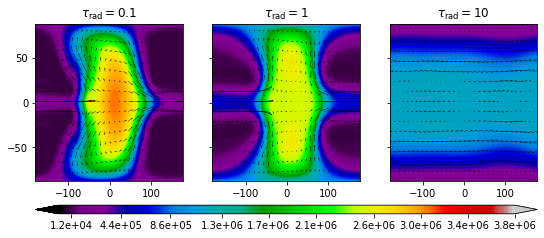

In [5]:


#fig, axs=plt.subplots(1,3,sharex=True,sharey=True, gridspec_kw=dict(height_ratios=[1, 1], width_ratios=[2, 2, 2]),figsize=(8,5))
fig, axs=plt.subplots(1,3,sharex=True,sharey=True, gridspec_kw=dict(width_ratios=[2, 2, 2]),figsize=(9,3))


X = lambdas*180/np.pi
Y = np.arcsin(mus)*180/np.pi

    
Xsparse=X[0::sparseness]
Ysparse=Y[0::sparseness]

bounds=[-100000,1.2*10**4,4.4*10**5,8.6*10**5,1.3*10**6,1.7*10**6,2.1*10**6,2.6*10**6,3.0*10**6,3.4*10**6,3.8*10**6]
bounds=np.array(bounds)+4*10**6
bounds2=np.interp(np.linspace(4*10**6-100000,4*10**6+3.8*10**6,len(bounds)*20),bounds,bounds)-4*10**6
CS = plt.contourf(X, Y, PhiPBSTaurad0p1, levels=bounds2, cmap=cm.nipy_spectral, extend='both')  
#fig.colorbar(location="bottom")
#colorbar = plt.colorbar(CS, orientation="horizontal")

#axs[0,0].contourf(X, Y, PhiPBSTaurad0p1+40*10**6,levels=bounds2, cmap=cm.nipy_spectral, extend='both')

UPhiPBSTaurad0p1sparse=UPBSTaurad0p1[0::sparseness,0::sparseness]
VPhiPBSTaurad0p1sparse=VPBSTaurad0p1[0::sparseness,0::sparseness]

aspectratio=1


axs[0].quiver(Xsparse,Ysparse,UPhiPBSTaurad0p1sparse,VPhiPBSTaurad0p1sparse)


axs[0].contourf(X, Y, PhiPBSTaurad0p1, cmap=cm.nipy_spectral,levels=bounds2)
UPhiPBSTaurad0p1sparse=UPBSTaurad0p1[0::sparseness,0::sparseness]
VPhiPBSTaurad0p1sparse=VPBSTaurad0p1[0::sparseness,0::sparseness]
axs[0].quiver(Xsparse,Ysparse,UPhiPBSTaurad0p1sparse,VPhiPBSTaurad0p1sparse)
axs[0].set_title(r'$\tau_{\rm rad}=0.1$')
#axs[0].set_title(r'$p_{\rm out}$')


axs[1].contourf(X, Y, PhiPBSTaurad1, cmap=cm.nipy_spectral,levels=bounds2)
UPhiPBSTaurad1sparse=UPBSTaurad1[0::sparseness,0::sparseness]
VPhiPBSTaurad1sparse=VPBSTaurad1[0::sparseness,0::sparseness]
axs[1].quiver(Xsparse,Ysparse,UPhiPBSTaurad1sparse,VPhiPBSTaurad1sparse)
axs[1].set_title(r'$\tau_{\rm rad}=1$')


axs[2].contourf(X, Y, PhiPBSTaurad10, cmap=cm.nipy_spectral,levels=bounds2)
UPhiPBSTaurad10sparse=UPBSTaurad10[0::sparseness,0::sparseness]
VPhiPBSTaurad10sparse=VPBSTaurad10[0::sparseness,0::sparseness]
axs[2].quiver(Xsparse,Ysparse,UPhiPBSTaurad10sparse,VPhiPBSTaurad10sparse)
axs[2].set_title(r'$\tau_{\rm rad}=10$')

fig.subplots_adjust(bottom=.15)

plt.draw()
p0 = axs[0].get_position().get_points().flatten()
p1 = axs[1].get_position().get_points().flatten()
p2 = axs[2].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0, p2[2]-p0[0], 0.04])
cbar=fig.colorbar(CS, cax=ax_cbar, orientation='horizontal',ticks=[1.2*10**4,4.4*10**5,8.6*10**5,1.3*10**6,1.7*10**6,2.1*10**6,2.6*10**6,3.0*10**6,3.4*10**6,3.8*10**6])
#cbar = fig.colorbar(CS, [8.6*10**5,1.3*10**6,1.7*10**6,2.1*10**6,2.6*10**6])
cbar.ax.set_xticklabels(['1.2e+04','4.4e+05','8.6e+05','1.3e+06','1.7e+06','2.1e+06','2.6e+06','3.0e+06','3.4e+06','3.8e+06']) 

plt.show()
fig.savefig('PBS.png', dpi = 300,bbox_inches='tight')




#cbar_ax = fig.add_axes([0.95, 0.05, 0.05, 0.7])
#fig.colorbar(CS,ax=axs.ravel().tolist())





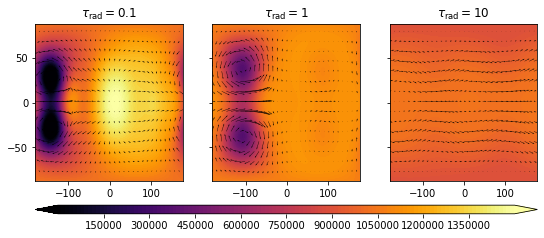

In [6]:
fig, axs=plt.subplots(1,3,sharex=True,sharey=True, gridspec_kw=dict(width_ratios=[2, 2, 2]),figsize=(9,3))

colorscheme=cm.inferno

X = lambdas*180/np.pi
Y = np.arcsin(mus)*180/np.pi

    
Xsparse=X[0::sparseness]
Ysparse=Y[0::sparseness]

bounds=[0,5*10**5,7.5*10**5,10**6,1.25*10**6,1.5*10**6]
bounds=np.array(bounds)
bounds2=np.interp(np.linspace(0,1.5*10**6,len(bounds)*20),bounds,bounds)
CS = plt.contourf(X, Y, PhiA3Taurad0p1, cmap=colorscheme, extend='both',levels=bounds2)  
#fig.colorbar(location="bottom")
#colorbar = plt.colorbar(CS, orientation="horizontal")

#axs[0,0].contourf(X, Y, PhiPBSTaurad0p1+40*10**6,levels=bounds2, cmap=cm.nipy_spectral, extend='both')

UPhiPBSTaurad0p1sparse=UPBSTaurad0p1[0::sparseness,0::sparseness]
VPhiPBSTaurad0p1sparse=VPBSTaurad0p1[0::sparseness,0::sparseness]

aspectratio=1


axs[0].contourf(X, Y, PhiA3Taurad0p1, cmap=colorscheme,extend='both',levels=bounds2)
UPhiA3Taurad0p1sparse=UA3Taurad0p1[0::sparseness,0::sparseness]
VPhiA3Taurad0p1sparse=VA3Taurad0p1[0::sparseness,0::sparseness]
axs[0].quiver(Xsparse,Ysparse,UPhiA3Taurad0p1sparse,VPhiA3Taurad0p1sparse)
axs[0].set_title(r'$\tau_{\rm rad}=0.1$')

axs[1].contourf(X, Y, PhiA3Taurad1, cmap=colorscheme,levels=bounds2)
UPhiA3Taurad1sparse=UA3Taurad1[0::sparseness,0::sparseness]
VPhiA3Taurad1sparse=VA3Taurad1[0::sparseness,0::sparseness]
axs[1].quiver(Xsparse,Ysparse,UPhiA3Taurad1sparse,VPhiA3Taurad1sparse)
axs[1].set_title(r'$\tau_{\rm rad}=1$')


axs[2].contourf(X, Y, PhiA3Taurad10, cmap=colorscheme,levels=bounds2)
UPhiA3Taurad10sparse=UA3Taurad10[0::sparseness,0::sparseness]
VPhiA3Taurad10sparse=VA3Taurad10[0::sparseness,0::sparseness]
axs[2].quiver(Xsparse,Ysparse,UPhiA3Taurad10sparse,VPhiA3Taurad10sparse)    
axs[2].set_title(r'$\tau_{\rm rad}=10$')

fig.subplots_adjust(bottom=.15)

plt.draw()
p0 = axs[0].get_position().get_points().flatten()
p1 = axs[1].get_position().get_points().flatten()
p2 = axs[2].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0, p2[2]-p0[0], 0.04])
tickarray=[1.5*10**5,3*10**5,4.5*10**5,6*10**5,7.5*10**5,9*10**5,1.05*10**6,1.2*10**6,1.35*10**6]
cbar=fig.colorbar(CS, cax=ax_cbar, orientation='horizontal',ticks=tickarray)
#cbar = fig.colorbar(CS, [1.5*10**5,3*10**5,4.5*10**6,6*10**5,7.5*10**5,9*10**5,1.05*10**6,1.2*10**6,1.35*10**6])
#cbar.ax.set_xticklabels(['1.2e+04','4.4e+05','8.6e+05','1.3e+06','1.7e+06','2.1e+06','2.6e+06','3.0e+06','3.4e+06','3.8e+06']) 

plt.show()
fig.savefig('SN.png', dpi = 300,bbox_inches='tight')

In [64]:
sample=read_pickle('high-Phibar4-P10-tau10-Phi')
[a,b]=np.shape(sample)

Phidata=np.zeros((9,a,b))
Udata=np.zeros((9,a,b))
Vdata=np.zeros((9,a,b))

Pvec=[1,5,10]
tauvec=['0p1',1,10]
for i in range(3):
    for j in range(3):
        Phifilename='high-Phibar4-P'+str(Pvec[j])+'-tau'+str(tauvec[i])+'-Phi'
        Phidata[i+3*j,:,:]=read_pickle(Phifilename)
        
        Ufilename='high-Phibar4-P'+str(Pvec[j])+'-tau'+str(tauvec[i])+'-U'
        Udata[i+3*j,:,:]=read_pickle(Ufilename)
        
        Vfilename='high-Phibar4-P'+str(Pvec[j])+'-tau'+str(tauvec[i])+'-V'
        Vdata[i+3*j,:,:]=read_pickle(Vfilename)



-265552.4310614747

In [71]:
#need for colorbar
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)



In [194]:
def makeplotgrid(Phidata,Udata,Vdata):
    
    """
    Creates a 3x3 plot

    Parameters
    ----------
    :param Phidata: 
        array of size 9xJxI
    
    :param U: 
         array of size 9xJxI
    
    
    :param V: 
        array of size 9xJxI
    
    -------
    :return fig: the figure

    """
    
    
    

    fig, axs=plt.subplots(3,3,sharex=True,sharey=True, constrained_layout=True, gridspec_kw=dict(width_ratios=[2, 2, 2]),figsize=(9,6))

    colorscheme=cm.inferno

    X = lambdas*180/np.pi
    Y = np.arcsin(mus)*180/np.pi


    Xsparse=X[0::sparseness]
    Ysparse=Y[0::sparseness]

    #bounds=[0,5*10**5,7.5*10**5,10**6,1.25*10**6,1.5*10**6]
    #bounds=np.array(bounds)
    #bounds2=np.interp(np.linspace(0,1.5*10**6,len(bounds)*20),bounds,bounds)
    bounds2=np.linspace(0,np.max(Phidata))
    CS = plt.contourf(X, Y, Phidata[0,:,:], cmap=colorscheme, extend='both',levels=bounds2)  
    #fig.colorbar(location="bottom")
    #colorbar = plt.colorbar(CS, orientation="horizontal")

    #axs[0,0].contourf(X, Y, PhiPBSTaurad0p1+40*10**6,levels=bounds2, cmap=cm.nipy_spectral, extend='both')

    aspectratio=1

    UP1tau0p1=Udata[0,:,:]
    VP1tau0p1=Vdata[0,:,:]
    axs[0,0].contourf(X, Y, Phidata[0,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP1tau0p1sparse=UP1tau0p1[0::sparseness,0::sparseness]
    VP1tau0p1sparse=VP1tau0p1[0::sparseness,0::sparseness]
    axs[0,0].quiver(Xsparse,Ysparse,UP1tau0p1sparse,VP1tau0p1sparse)
    axs[0,0].set_title(r'$\tau_{\rm rad}=0.1$')
    axs[0,0].set_ylabel(r'$P_{\rm rot}=1$')

    UP1tau1=Udata[1,:,:]
    VP1tau1=Vdata[1,:,:]
    axs[0,1].contourf(X, Y, Phidata[1,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP1tau1sparse=UP1tau1[0::sparseness,0::sparseness]
    VP1tau1sparse=VP1tau1[0::sparseness,0::sparseness]
    axs[0,1].quiver(Xsparse,Ysparse,UP1tau1sparse,VP1tau1sparse)
    axs[0,1].set_title(r'$\tau_{\rm rad}=0.1$')


    UP1tau10=Udata[2,:,:]
    VP1tau10=Vdata[2,:,:]
    axs[0,2].contourf(X, Y, Phidata[2,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP1tau10sparse=UP1tau10[0::sparseness,0::sparseness]
    VP1tau10sparse=VP1tau10[0::sparseness,0::sparseness]
    axs[0,2].quiver(Xsparse,Ysparse,UP1tau10sparse,VP1tau10sparse)
    axs[0,2].set_title(r'$\tau_{\rm rad}=10$')


    UP5tau0p1=Udata[3,:,:]
    VP5tau0p1=Vdata[3,:,:]
    axs[1,0].contourf(X, Y, Phidata[3,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP5tau0p1sparse=UP1tau0p1[0::sparseness,0::sparseness]
    VP5tau0p1sparse=VP1tau0p1[0::sparseness,0::sparseness]
    axs[1,0].quiver(Xsparse,Ysparse,UP5tau0p1sparse,VP5tau0p1sparse)
    axs[1,0].set_ylabel(r'$P_{\rm rot}=5$')


    UP5tau1=Udata[4,:,:]
    VP5tau1=Vdata[4,:,:]
    axs[1,1].contourf(X, Y, Phidata[4,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP5tau1sparse=UP5tau1[0::sparseness,0::sparseness]
    VP5tau1sparse=VP5tau1[0::sparseness,0::sparseness]
    axs[1,1].quiver(Xsparse,Ysparse,UP5tau1sparse,VP5tau1sparse)

    

    UP5tau10=Udata[5,:,:]
    VP5tau10=Vdata[5,:,:]
    axs[1,2].contourf(X, Y, Phidata[5,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP5tau10sparse=UP5tau10[0::sparseness,0::sparseness]
    VP5tau10sparse=VP5tau10[0::sparseness,0::sparseness]
    axs[1,2].quiver(Xsparse,Ysparse,UP5tau10sparse,VP5tau10sparse)

   
    UP10tau0p1=Udata[6,:,:]
    VP10tau0p1=Vdata[6,:,:]
    axs[2,0].contourf(X, Y, Phidata[6,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP10tau0p1sparse=UP10tau0p1[0::sparseness,0::sparseness]
    VP10tau0p1sparse=VP10tau0p1[0::sparseness,0::sparseness]
    axs[2,0].quiver(Xsparse,Ysparse,UP10tau0p1sparse,VP10tau0p1sparse)
    axs[2,0].set_ylabel(r'$P_{\rm rot}=10$')
    
    UP10tau1=Udata[7,:,:]
    VP10tau1=Vdata[7,:,:]
    axs[2,1].contourf(X, Y, Phidata[7,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP10tau1sparse=UP10tau1[0::sparseness,0::sparseness]
    VP10tau1sparse=VP10tau1[0::sparseness,0::sparseness]
    axs[2,1].quiver(Xsparse,Ysparse,UP10tau1sparse,VP10tau1sparse)


    UP10tau10=Udata[8,:,:]
    VP10tau10=Vdata[8,:,:]
    axs[2,2].contourf(X, Y, Phidata[8,:,:], cmap=colorscheme,extend='both',levels=bounds2)
    UP10tau10sparse=UP10tau10[0::sparseness,0::sparseness]
    VP10tau10sparse=VP10tau10[0::sparseness,0::sparseness]
    axs[2,2].quiver(Xsparse,Ysparse,UP10tau10sparse,VP10tau10sparse)
   


    ax_cbar=axs[:, 2]
    
    cbar=fig.colorbar(CS, ax=ax_cbar,format=ticker.FuncFormatter(fmt))
    
    plt.show()
    
    #return fig


[0.39852941 0.65794118 0.62647059 0.88      ]
[0.67205882 0.39147059 0.9        0.61352941]
[0.67205882 0.125      0.9        0.34705882]


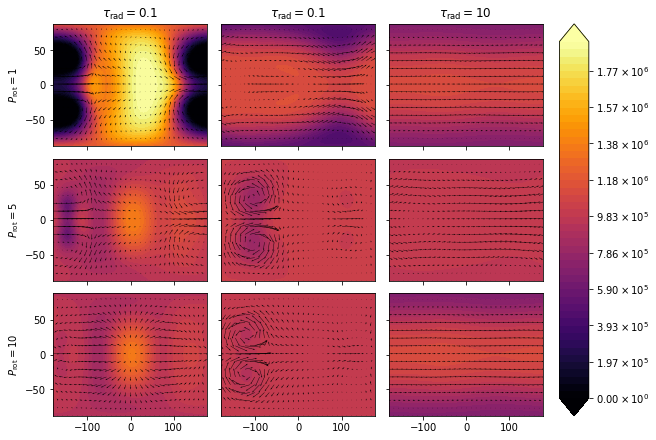

In [195]:
makeplotgrid(Phidata,Udata,Vdata)

In [ ]:
#make one zonal plot and format it nicely

In [ ]:
#make zonal 3x3 subplots thingy